# Excitation Analysis

***NOTE: You should run `extract_excitations.py` before running this note!***

This note is the code used for **5. Analysis of Excitation** in the paper. See more details in the paper!: https://arxiv.org/abs/1710.10451

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load excitation dataframe

In [2]:
df = pd.read_pickle('./excitations.pkl')

#### Average excitations for each tag at specific depth

In [3]:
rows = []
for tag in df.columns[2:].tolist():
    tag_ex = df[df[tag] == 1]
    for depth in df.depth.unique():
        tag_depth_ex = tag_ex.loc[tag_ex.depth == depth, 'ex']
        tag_depth_ex = np.mean(tag_depth_ex.values)
        rows.append([tag_depth_ex, depth, tag])

ex = pd.DataFrame(data=rows, columns=['ex', 'depth', 'tag'])

#### Define functions needed for plotting

In [4]:
def plot_ex(depth, sort=True, tags=[]):
    """Plot excitations.
    Args:
        depth: Depth to plot (0~8).
        sort: Sort channels by average of excitations.
        tags: Tags to plot. Plot all tags by default.
    """
    if not len(tags):
        tags = ex.tag.unique().tolist()
        
    tag_exs = [ex.loc[(ex.tag == tag) & (ex.depth == depth), 'ex'].iloc[0] for tag in tags]
    tag_exs = np.stack(tag_exs)

    if sort:
        order = tag_exs.mean(axis=0).argsort()
        tag_exs = tag_exs[:, order]

    plt.figure(figsize=(18, 8))
    for tag_ex, tag in zip(tag_exs, tags):
        plt.plot(tag_ex, label=tag)

    plt.legend(ncol=10)
    plt.xlim(0, tag_exs.shape[1])
    plt.ylim(0, 1)

def ex_stddev(depth):
    """Calculate a standard deviation of excitations at specific depth."""
    tags = ex.tag.unique().tolist()
    tag_exs = [ex.loc[(ex.tag == tag) & (ex.depth == depth), 'ex'].iloc[0] for tag in tags]
    tag_exs = np.stack(tag_exs)
    return tag_exs.std(axis=0).mean()

#### Excitations at the first block

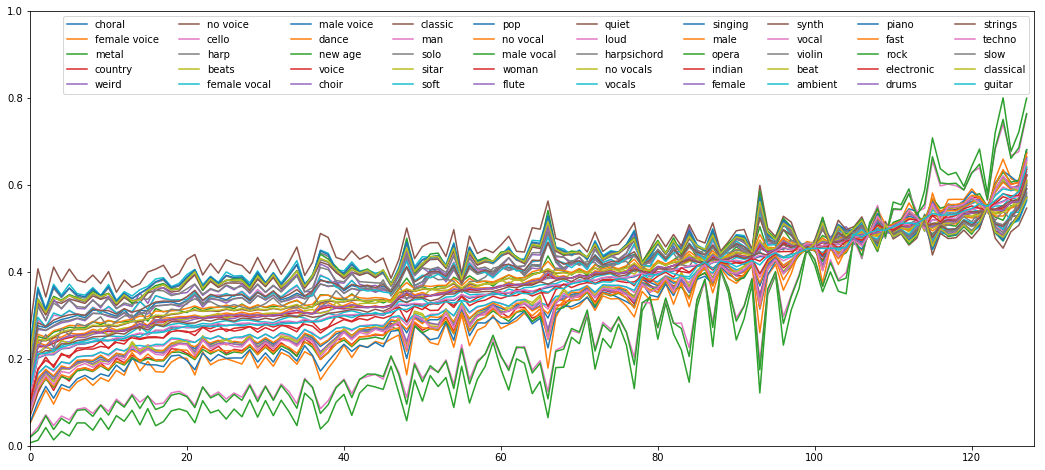

In [5]:
plot_ex(0)

#### Excitations at the mid (5th) block

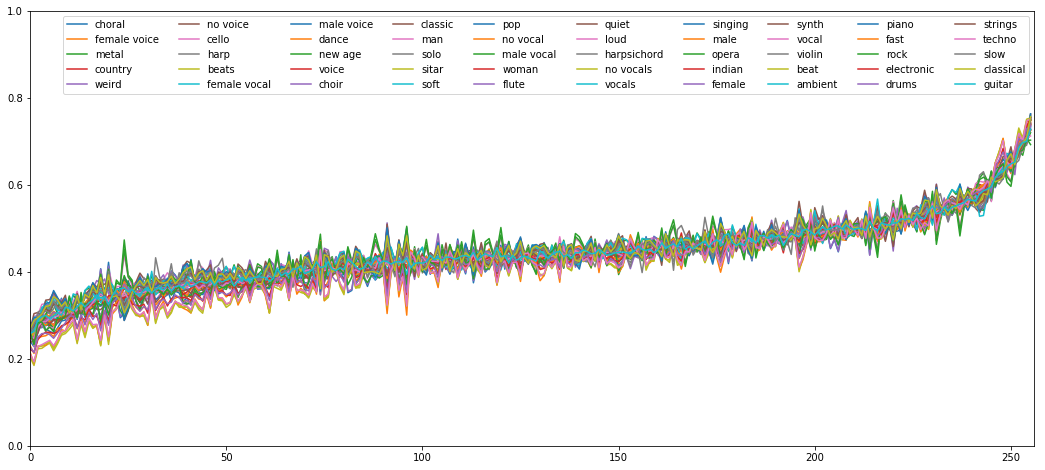

In [6]:
plot_ex(4)

#### Excitations at the last (9th) block

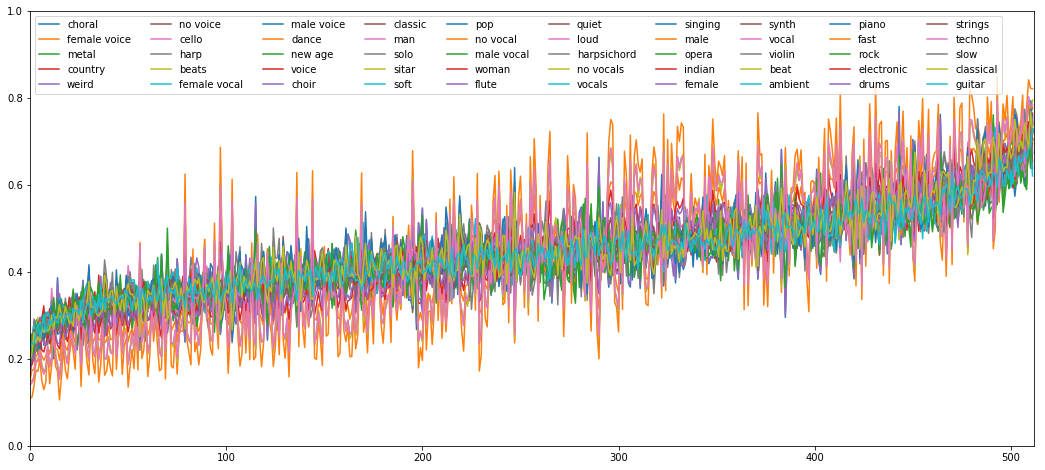

In [7]:
plot_ex(8)

#### Excitations of 'classical', 'metal', and 'dance' at the first block

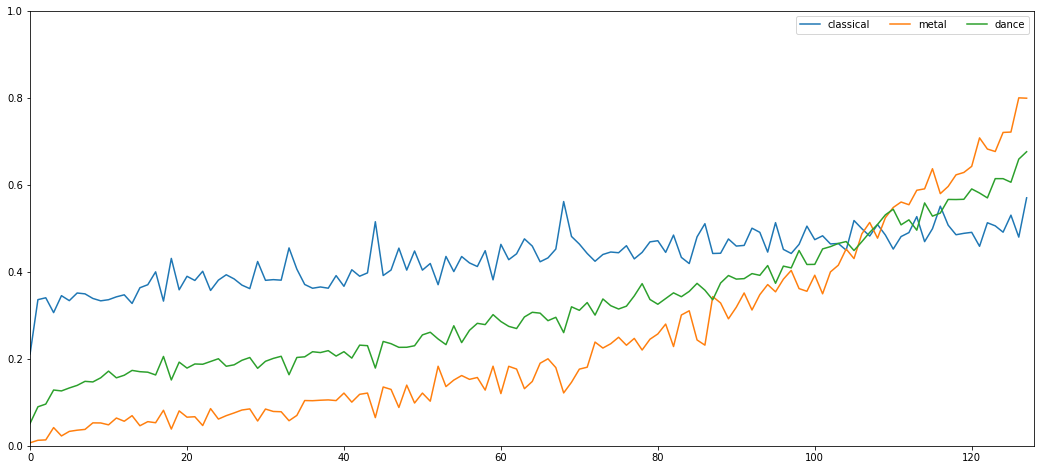

In [8]:
plot_ex(0, tags=['classical', 'metal', 'dance'])

#### Standard deviation of excitations across all tags along each layer

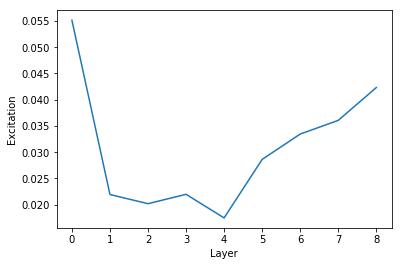

In [9]:
plt.xlabel('Layer')
plt.ylabel('Excitation')
plt.plot([ex_stddev(depth) for depth in range(9)])